#UCI adult dataset

##Descrição

O UCI Adult dataset é um conjunto de dados amplamente utilizado em estudos de aprendizado de máquina, especialmente em problemas de classificação e análise de discriminação. Originalmente extraído dos dados do censo de 1994 dos Estados Unidos, ele contém informações demográficas e econômicas de mais de 48.000 indivíduos.

Estrutura do Dataset:
O UCI Adult dataset é composto por 14 atributos, dos quais 6 são contínuos e 8 são categóricos. O objetivo do conjunto de dados é prever se o rendimento anual de uma pessoa excede 50.000 dólares. Aqui estão os principais atributos:

Age: Idade do indivíduo (contínuo).
Workclass: Tipo de emprego (categórico) - Ex.: Private, Self-emp-not-inc, Federal-gov.
Education: Nível de educação alcançado (categórico) - Ex.: Bachelors, HS-grad, Masters.
Education-num: Número de anos de educação (contínuo).
Marital-status: Estado civil (categórico) - Ex.: Married-civ-spouse, Divorced, Never-married.
Occupation: Ocupação (categórico) - Ex.: Tech-support, Craft-repair, Sales.
Relationship: Relação familiar (categórico) - Ex.: Husband, Not-in-family, Own-child.
Race: Raça (categórico) - Ex.: White, Asian-Pac-Islander, Black.
Sex: Gênero (categórico) - Ex.: Male, Female.
Capital-gain: Ganho de capital (contínuo).
Capital-loss: Perda de capital (contínuo).
Hours-per-week: Horas trabalhadas por semana (contínuo).
Native-country: País de origem (categórico) - Ex.: United-States, Mexico, Germany.
Income: Classe alvo (binário) - Ex.: '>50K', '<=50K'.
Utilização:
O UCI Adult dataset é frequentemente usado para:

Análise de Discriminação: Examinar como variáveis como raça, gênero e estado civil podem influenciar a renda.
Treinamento de Modelos de Classificação: Como regressão logística, árvores de decisão, redes neurais, entre outros.
Estudos de Fairness e Bias: Avaliar se os modelos de aprendizado de máquina discriminam certos grupos de pessoas com base em características sensíveis.
O conjunto de dados é popular devido à sua simplicidade e à relevância dos atributos para estudos de discriminação e análise socioeconômica.

##Regressao Logistica

###Desempenho

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


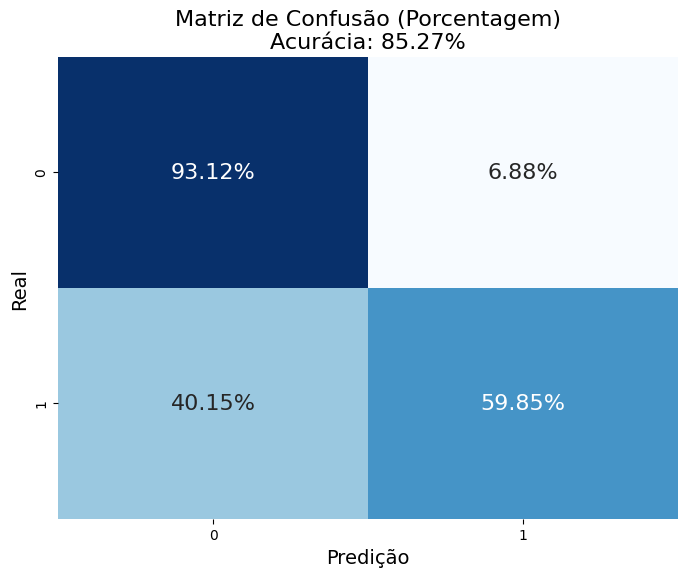

ROC AUC: 0.9043476729016889


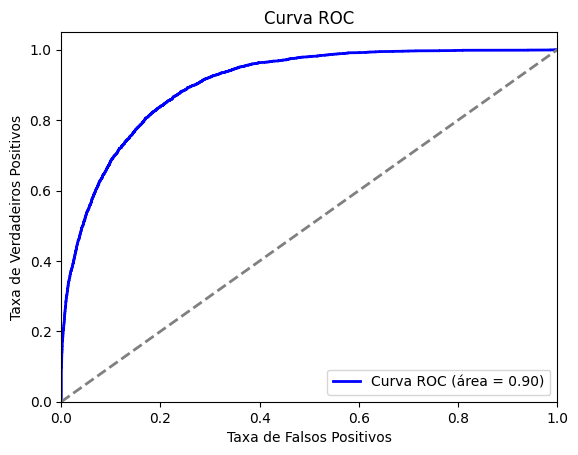

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregando os dados de treinamento e teste
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')


train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])

# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Função para adicionar o símbolo de porcentagem aos valores na matriz de confusão
labels = [f'{value:.2f}%' for value in conf_matrix_percentage.flatten()]
labels = np.array(labels).reshape(conf_matrix.shape)

# Converter a acurácia para porcentagem
accuracy_percentage = accuracy * 100

# Plot da matriz de confusão com porcentagens e a acurácia em porcentagem
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title(f'Matriz de Confusão (Porcentagem)\nAcurácia: {accuracy_percentage:.2f}%', size=16)
plt.xlabel('Predição', size=14)
plt.ylabel('Real', size=14)
plt.show()



print(f"ROC AUC: {roc_auc}")

# Plot da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

###Fairness

In [ ]:
!pip install aequitas

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from aequitas import Audit
from aequitas.plotting import Plot

# URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregando os dados de treinamento e teste
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values="?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values="?", sep=',\s', engine='python')

# Tratar valores ausentes
train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])

# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Preparar o DataFrame para o Aequitas
aequitas_df = test_data_adult[['sex', 'race']].copy()
aequitas_df['label'] = test_data_adult['income']  # Renomeia a coluna de rótulo para 'label_value'
aequitas_df['score'] = y_pred  # Adiciona as previsões do modelo

# Inicializando o Audit sem passar o DataFrame
audit = Audit(aequitas_df)

# Gera o gráfico de summary_plot para as métricas desejadas
audit.audit()
# Obtém o relatório completo
results = audit.get_results()  # Assumindo que 'get_results' retorna os resultados da auditoria em formato de DataFrame
print(results)



ModuleNotFoundError: No module named 'aequitas'

##Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


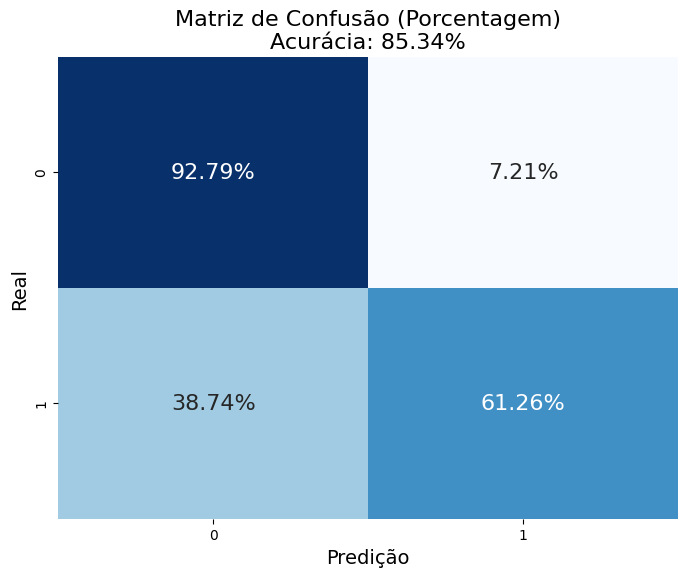

ROC AUC: 0.9011189020138208


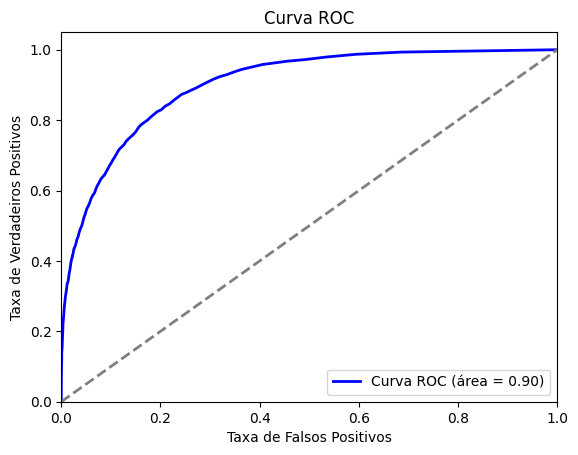

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregando os dados de treinamento e teste
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')

# Tratar valores ausentes
train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])

# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Função para adicionar o símbolo de porcentagem aos valores na matriz de confusão
labels = [f'{value:.2f}%' for value in conf_matrix_percentage.flatten()]
labels = np.array(labels).reshape(conf_matrix.shape)

# Converter a acurácia para porcentagem
accuracy_percentage = accuracy * 100

# Plot da matriz de confusão com porcentagens e a acurácia em porcentagem
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title(f'Matriz de Confusão (Porcentagem)\nAcurácia: {accuracy_percentage:.2f}%', size=16)
plt.xlabel('Predição', size=14)
plt.ylabel('Real', size=14)
plt.show()

print(f"ROC AUC: {roc_auc}")

# Plot da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


##Gadient Boosting

###desempenho

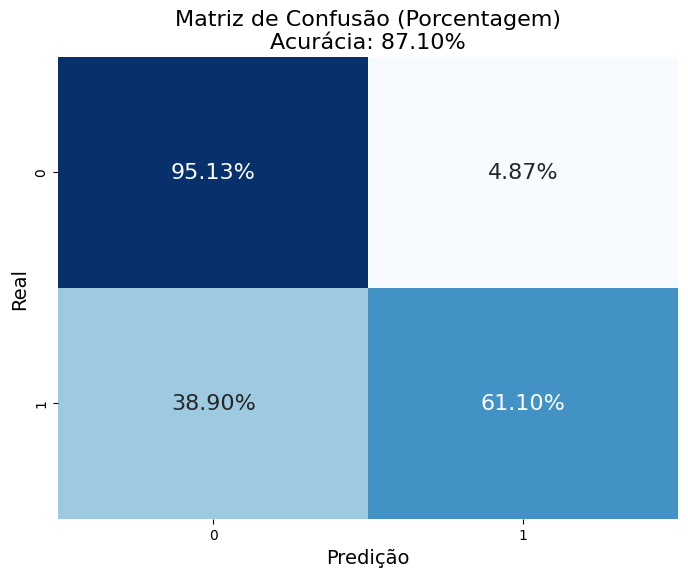

ROC AUC: 0.9208309418022077


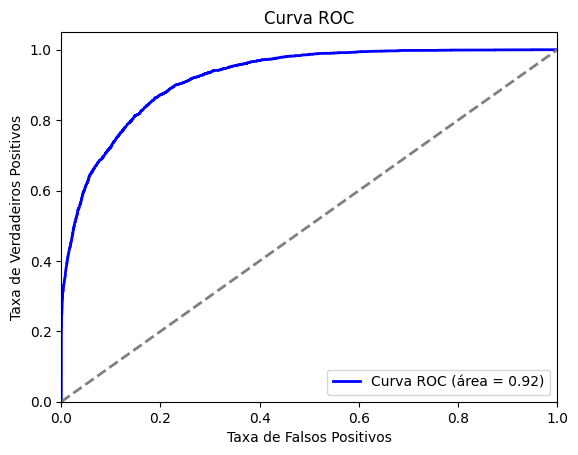

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregando os dados de treinamento e teste
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')

train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])

# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Função para adicionar o símbolo de porcentagem aos valores na matriz de confusão
labels = [f'{value:.2f}%' for value in conf_matrix_percentage.flatten()]
labels = np.array(labels).reshape(conf_matrix.shape)

# Converter a acurácia para porcentagem
accuracy_percentage = accuracy * 100

# Plot da matriz de confusão com porcentagens e a acurácia em porcentagem
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title(f'Matriz de Confusão (Porcentagem)\nAcurácia: {accuracy_percentage:.2f}%', size=16)
plt.xlabel('Predição', size=14)
plt.ylabel('Real', size=14)
plt.show()

print(f"ROC AUC: {roc_auc}")

# Plot da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


###fairness

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from aequitas import Audit
from aequitas.plotting import Plot

# URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregando os dados de treinamento e teste
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values="?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values="?", sep=',\s', engine='python')

# Tratar valores ausentes
train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])

# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Preparar o DataFrame para o Aequitas
aequitas_df = test_data_adult[['sex', 'race']].copy()
aequitas_df['label'] = test_data_adult['income']  # Renomeia a coluna de rótulo para 'label_value'
aequitas_df['score'] = y_pred  # Adiciona as previsões do modelo

# Inicializando o Audit com os dados
audit = Audit(aequitas_df)

# Realizando a auditoria
audit.audit()

# Gera o gráfico de summary_plot para as métricas desejadas
audit.summary_plot(["tpr", "fpr", "pprev"])


ModuleNotFoundError: No module named 'aequitas'